<a href="https://colab.research.google.com/github/kavya-kango/Netflix_show_clustering/blob/main/Netflix_Movies_and_TV_Shows_Clustering_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Project Name:**   Netflix Movies and TV Shows Clustering

##### **Project Type**    - Unsupervised ML project


## Business Context

This dataset consists of tv shows and movies available on Netflix as of 2019. The dataset is collected from Flixable which is a third-party Netflix search engine. In 2018, they released an interesting report which shows that the number of TV shows on Netflix has nearly tripled since 2010. The streaming service’s number of movies has decreased by more than 2,000 titles since 2010, while its number of TV shows has nearly tripled. It will be interesting to explore what all other insights can be obtained from the same dataset.

Integrating this dataset with other external datasets such as IMDB ratings, rotten tomatoes can also provide many interesting findings.

In this project, you are required to do

* Exploratory Data Analysis

* Understanding what type content is available in different countries

* If Netflix has been increasingly focusing on TV rather than movies in recent years.

* Clustering similar content by matching text-based features.

## **Dataset Description**

* title: Name of the movie or show

* type: Either Movie or TV Show

* genre or listed_in: Genres or categories assigned (e.g., Drama, Comedy)

* release_year: Year the content was released

* country: Country of production or availability

* duration: Either length (for movies) or number of seasons (for shows)

* rating: Content rating (e.g., PG, R, TV-MA)

* description: Brief summary or synopsis

* cast / director: Key contributors (might be merged as a single string)

* date_added: Date the content was added to Netflix




**Importing necessary libraries**

In [106]:
# Importing the necessary libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
from matplotlib.pyplot import figure
import plotly.graph_objects as go
import plotly.offline as py
import plotly.express as px
from datetime import datetime

import warnings
warnings.filterwarnings('ignore')

In [107]:
# Import Libraries
# Importing Numpy & Pandas for data processing & data wrangling
import numpy as np
import pandas as pd

# Importing  tools for visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Importing libraries for hypothesis testing
from scipy.stats import uniform
from scipy.stats import norm
from scipy.stats import chi2
from scipy.stats import t
from scipy.stats import f
from scipy.stats import ttest_ind
import scipy.stats as stats

# Word Cloud library
from wordcloud import WordCloud, STOPWORDS

# Library used for textual data preprocessing
import string
string.punctuation
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
from nltk.stem.snowball import SnowballStemmer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import PCA
from statsmodels.stats.proportion import proportions_ztest

# Library used for Clusters implementation
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer
from sklearn.metrics import silhouette_score, silhouette_samples
from yellowbrick.cluster import SilhouetteVisualizer
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as sch

# Library used for building recommendation system
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import *

# Library used for ignore warnings
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [108]:
# Mounting the data using google drive
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [109]:

# give the path of the dataset
path = '/content/drive/MyDrive/NETFLIX MOVIES AND TV SHOWS CLUSTERING.csv'

In [110]:
#Loading the dataset
df = pd.read_csv(path)

In [111]:
df

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...
...,...,...,...,...,...,...,...,...,...,...,...,...
7782,s7783,Movie,Zozo,Josef Fares,"Imad Creidi, Antoinette Turk, Elias Gergi, Car...","Sweden, Czech Republic, United Kingdom, Denmar...","October 19, 2020",2005,TV-MA,99 min,"Dramas, International Movies",When Lebanon's Civil War deprives Zozo of his ...
7783,s7784,Movie,Zubaan,Mozez Singh,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,"March 2, 2019",2015,TV-14,111 min,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...
7784,s7785,Movie,Zulu Man in Japan,NaN,Nasty C,NaN,"September 25, 2020",2019,TV-MA,44 min,"Documentaries, International Movies, Music & M...","In this documentary, South African rapper Nast..."
7785,s7786,TV Show,Zumbo's Just Desserts,NaN,"Adriano Zumbo, Rachel Khoo",Australia,"October 31, 2020",2019,TV-PG,1 Season,"International TV Shows, Reality TV",Dessert wizard Adriano Zumbo looks for the nex...


In [112]:
# Checking the shape of the dataframe
df.shape

(7787, 12)

The dataset contains 7787 rows and 12 columns.

In [113]:
# View top 5 rows
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...


In [114]:
# View last 5 rows
df.tail()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
7782,s7783,Movie,Zozo,Josef Fares,"Imad Creidi, Antoinette Turk, Elias Gergi, Car...","Sweden, Czech Republic, United Kingdom, Denmar...","October 19, 2020",2005,TV-MA,99 min,"Dramas, International Movies",When Lebanon's Civil War deprives Zozo of his ...
7783,s7784,Movie,Zubaan,Mozez Singh,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,"March 2, 2019",2015,TV-14,111 min,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...
7784,s7785,Movie,Zulu Man in Japan,NaN,Nasty C,NaN,"September 25, 2020",2019,TV-MA,44 min,"Documentaries, International Movies, Music & M...","In this documentary, South African rapper Nast..."
7785,s7786,TV Show,Zumbo's Just Desserts,NaN,"Adriano Zumbo, Rachel Khoo",Australia,"October 31, 2020",2019,TV-PG,1 Season,"International TV Shows, Reality TV",Dessert wizard Adriano Zumbo looks for the nex...
7786,s7787,Movie,ZZ TOP: THAT LITTLE OL' BAND FROM TEXAS,Sam Dunn,NaN,"United Kingdom, Canada, United States","March 1, 2020",2019,TV-MA,90 min,"Documentaries, Music & Musicals",This documentary delves into the mystique behi...


In [115]:
# To view Columns name
df.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [116]:
# To view Information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7787 entries, 0 to 7786
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       7787 non-null   object
 1   type          7787 non-null   object
 2   title         7787 non-null   object
 3   director      5398 non-null   object
 4   cast          7069 non-null   object
 5   country       7280 non-null   object
 6   date_added    7777 non-null   object
 7   release_year  7787 non-null   int64 
 8   rating        7780 non-null   object
 9   duration      7787 non-null   object
 10  listed_in     7787 non-null   object
 11  description   7787 non-null   object
dtypes: int64(1), object(11)
memory usage: 730.2+ KB


In [117]:
# Data describe
df.describe()

,release_year
count,7787.000000
mean,2013.932580
std,8.757395
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2018.000000
max,2021.000000


In [118]:
# Dataset Describe (all columns included)
df.describe(include= 'all').round(2)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
count,7787,7787,7787,5398,7069,7280,7777,7787.00,7780,7787,7787,7787
unique,7787,2,7787,4049,6831,681,1565,NaN,14,216,492,7769
top,s7787,Movie,ZZ TOP: THAT LITTLE OL' BAND FROM TEXAS,"Raúl Campos, Jan Suter",David Attenborough,United States,"January 1, 2020",NaN,TV-MA,1 Season,Documentaries,Multiple women report their husbands as missin...
freq,1,5377,1,18,18,2555,118,NaN,2863,1608,334,3
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2013.93,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.76,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1925.00,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2013.00,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017.00,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018.00,NaN,NaN,NaN,NaN


In [119]:
# Dataset Duplicate Value Count
df.duplicated().sum()

np.int64(0)

In [120]:
# Missing Values/Null Values Count
df.isnull().sum()

,0
show_id,0
type,0
title,0
director,2389
cast,718
country,507
date_added,10
release_year,0
rating,7
duration,0


We found that there are 2389 null values in director column, 718 null values in cast column, 507 null values in country column, 10 null values in date_added column and 7 null values in rating column.

In [121]:
#total null values
df.isnull().sum().sum()

np.int64(3631)

There are total 3631 null values in the dataset.

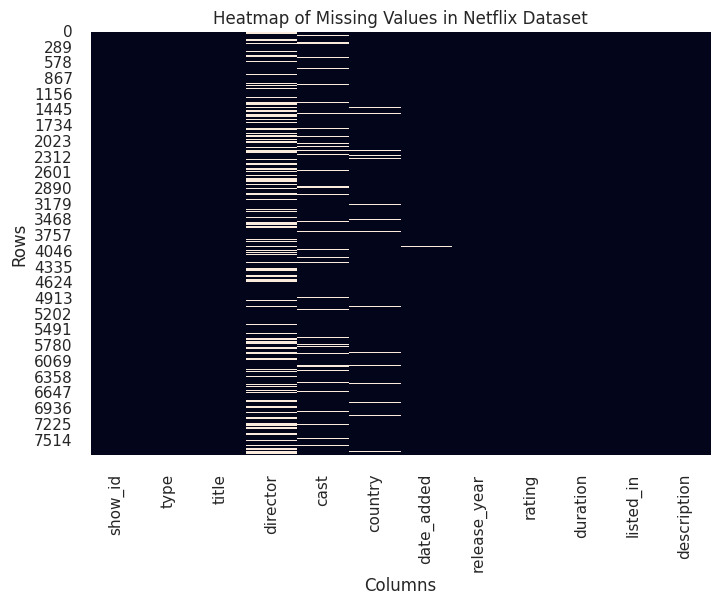

In [122]:
# Visualizing the missing values by Plotting Heatmap
#plt.figure(figsize=(12, 8))
sns.heatmap(df.isnull(), cbar=False)
plt.title('Heatmap of Missing Values in Netflix Dataset')
plt.xlabel('Columns')
plt.ylabel('Rows')
plt.show()

In [123]:
# Filling cast null values as not available
df['cast'].fillna(value='Not available',inplace=True)
#df['cast'].fillna(value='No cast',inplace=True)

In [124]:
# Filling country null values with mode imputation
df['country'].fillna(value=df['country'].mode()[0],inplace=True)

In [125]:
#'date_added' and 'rating' contains an insignificant portion of the data so we will drop them from the dataset
df.dropna(subset=['date_added','rating'],inplace=True)

In [126]:
#Dropping Director Column
df.drop(['director'],axis=1,inplace=True)

In [127]:
#again checking is there any null values are not
df.isnull().sum()

,0
show_id,0
type,0
title,0
cast,0
country,0
date_added,0
release_year,0
rating,0
duration,0
listed_in,0


##**Exploratory Data Analysis**

Chart - 1 : Movies vs TV Shows

In [128]:
# Count of Movies and TVShows
df['type'].value_counts()

,count
type,
Movie,5372
TV Show,2398


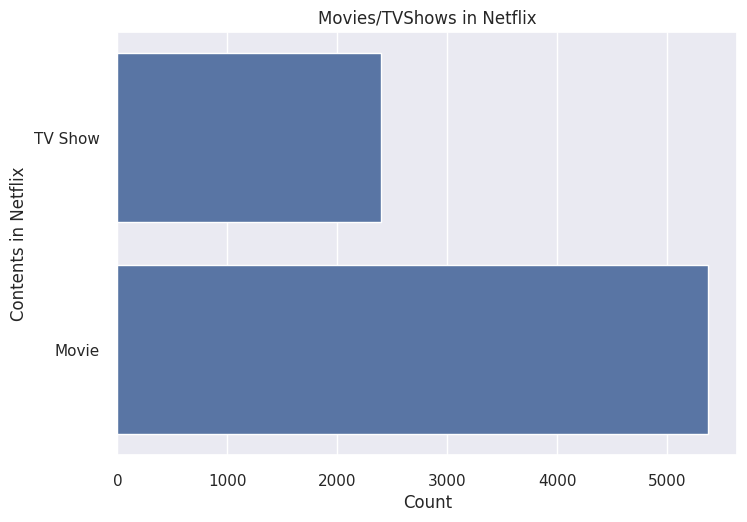

In [129]:
#countplot to visualize the number of movies and tv_shows in type column
sns.countplot(df['type'])
# Set the title
plt.title('Movies/TVShows in Netflix')
# Set x-label
plt.xlabel('Count')
#Set y-label
plt.ylabel('Contents in Netflix')
# Display the graph
plt.show()

Chart - 2 : Distribution of Various Ratings

In [130]:
df['rating']

,rating
0,TV-MA
1,TV-MA
2,R
3,PG-13
4,PG-13
...,...
7782,TV-MA
7783,TV-14
7784,TV-MA
7785,TV-PG


In [131]:
#Assigning the Ratings into grouped categories
ratings = {
    'TV-PG': 'Older Kids',
    'TV-MA': 'Adults',
    'TV-Y7-FV': 'Older Kids',
    'TV-Y7': 'Older Kids',
    'TV-14': 'Teens',
    'R': 'Adults',
    'TV-Y': 'Kids',
    'NR': 'Adults',
    'PG-13': 'Teens',
    'TV-G': 'Kids',
    'PG': 'Older Kids',
    'G': 'Kids',
    'UR': 'Adults',
    'NC-17': 'Adults'
}
df['target_ages'] = df['rating'].replace(ratings)

In [132]:
# type should be a categorical
df['type'] = pd.Categorical(df['type'])
df['target_ages'] = pd.Categorical(df['target_ages'], categories=['Kids', 'Older Kids', 'Teens', 'Adults'])

In [133]:
df.head(3)

,show_id,type,title,cast,country,date_added,release_year,rating,duration,listed_in,description,target_ages
0,s1,TV Show,3%,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...,Adults
1,s2,Movie,7:19,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...,Adults
2,s3,Movie,23:59,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow...",Adults


In [134]:
#creating two extra columns movies and tv_shows
tv_shows=df[df['type']=='TV Show']
movies=df[df['type']=='Movie']

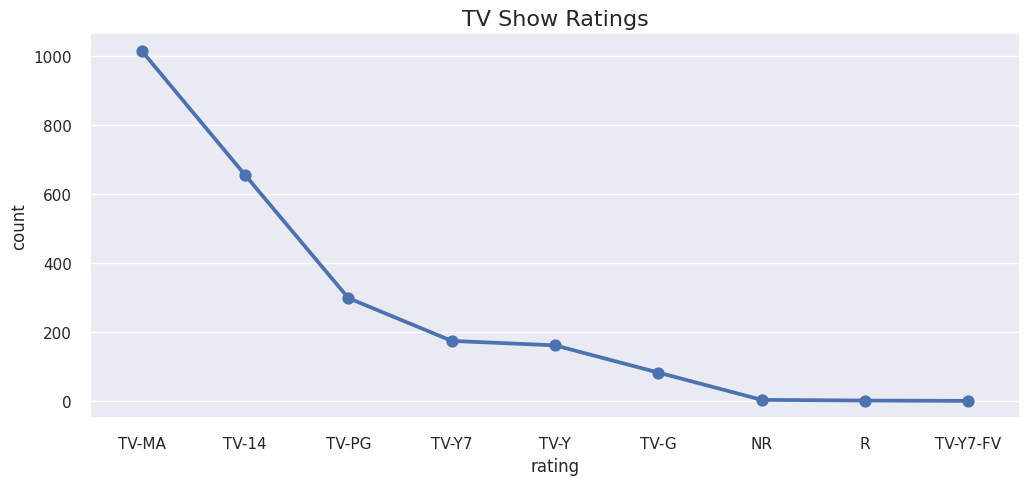

In [135]:
#Rating based on rating system of all TV Shows
tv_ratings = tv_shows.groupby(['rating'])['show_id'].count().reset_index(name='count').sort_values(by='count',ascending=False)
# Plot the figure size
fig_dims = (12,5)
fig, ax = plt.subplots(figsize=fig_dims)
sns.pointplot(x='rating',y='count',data=tv_ratings)
# Set the title
plt.title('TV Show Ratings',size='16')
# Display the graph
plt.show()

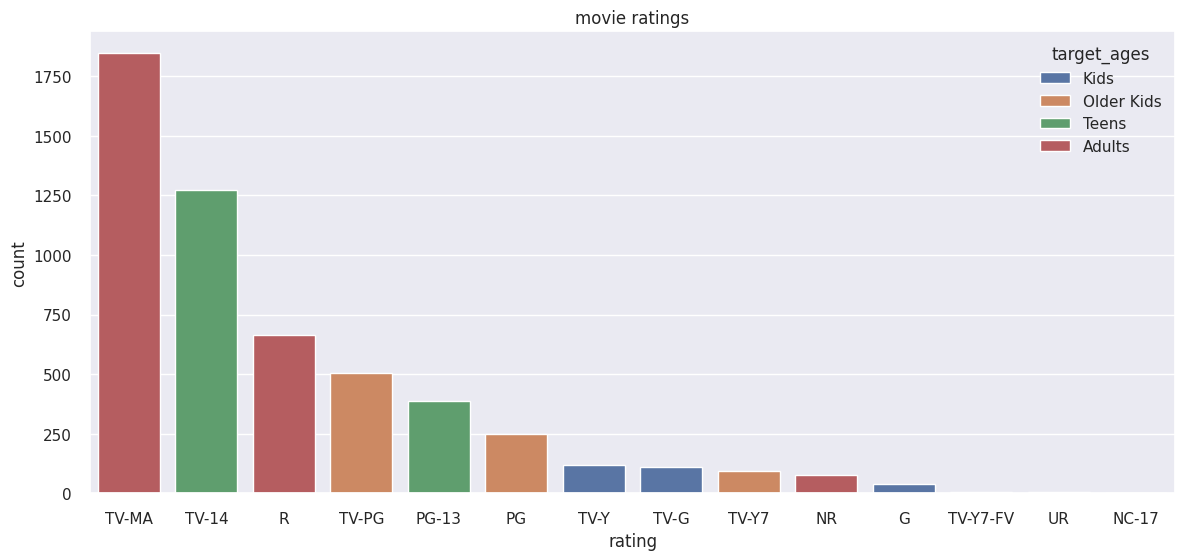

In [136]:
#Movie Ratings based on Target Age Groups
# Plot the figure size
plt.figure(figsize=(14,6))
sns.countplot(x=movies['rating'],hue=movies['target_ages'],data=movies,order=movies['rating'].value_counts().index)
# Set the title
plt.title('movie ratings')
# Display the graph
plt.show()

TV-MA is the highest rating overall the movies.

Chart - 3: Content Released Over The Years

In [137]:
# Year wise movies released
movies_year =movies['release_year'].value_counts().sort_index(ascending=False)
movies_year

,count
release_year,
2021,12
2020,411
2019,582
2018,734
2017,742
...,...
1946,1
1945,3
1944,3


In [138]:
tvshows_year =tv_shows['release_year'].value_counts().sort_index(ascending=False)
tvshows_year

,count
release_year,
2021,19
2020,457
2019,414
2018,386
2017,268
2016,239
2015,156
2014,90
2013,63


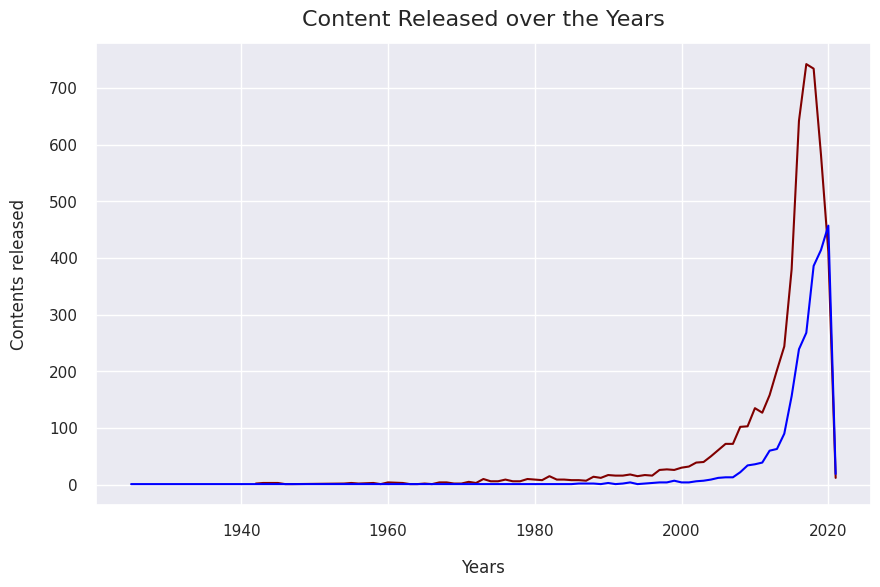

In [139]:
# visualizing the movies and tv_shows based on the release year
sns.set(font_scale=1.0)
movies_year.plot(figsize=(10,6), linewidth=1.5, color='maroon',label="Movies / year",ms=3)
tvshows_year.plot(figsize=(10,6), linewidth=1.5, color='blue',label="TV Shows / year")
# Set the title
plt.title("Content Released over the Years", y=1.02, fontsize=16)
# Set the x-label
plt.xlabel("Years", labelpad=15)
# Set the y-label
plt.ylabel("Contents released", labelpad=15)
# Display the graph
plt.show()


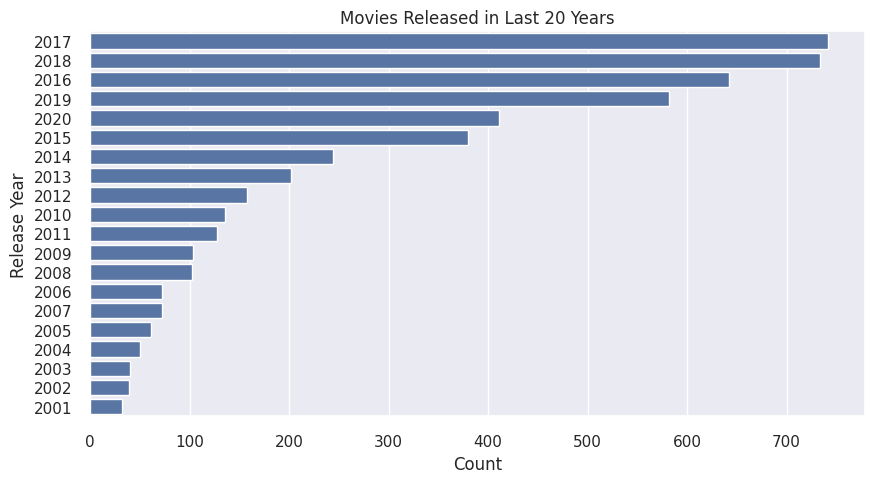

In [140]:
#Analysing how many movies released per year in last 20 years
plt.figure(figsize=(10,5))
sns.countplot(y=movies['release_year'],data=df,order=movies['release_year'].value_counts().index[0:20])
# Set the title
plt.title('Movies Released in Last 20 Years')
# Set x-label
plt.xlabel('Count')
# Set y-label
plt.ylabel('Release Year')
# Display the graph
plt.show()


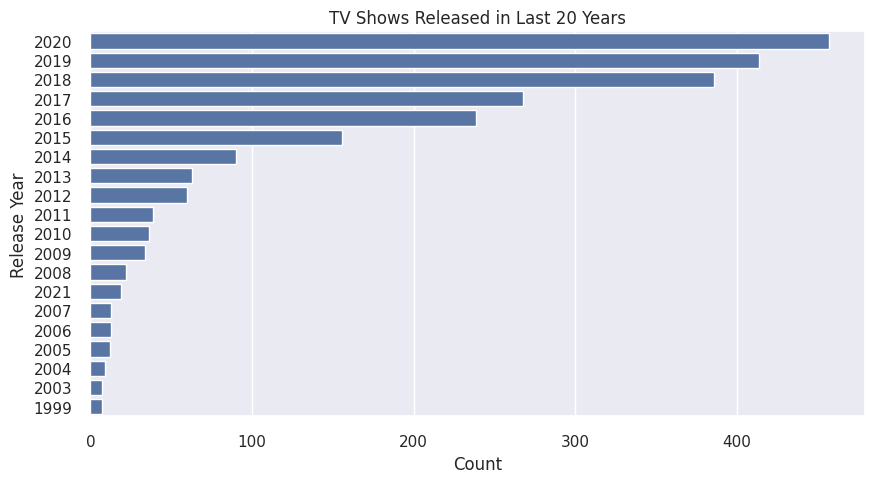

In [141]:
#Analysing how many movies released per year in last 20 years
plt.figure(figsize=(10,5))
sns.countplot(y=tv_shows['release_year'],data=df,order=tv_shows['release_year'].value_counts().index[0:20])
# Set the title
plt.title('TV Shows Released in Last 20 Years')
# Set x-label
plt.xlabel('Count')
# Set y-label
plt.ylabel('Release Year')
# Display the graph
plt.show()


Chart - 4 : Overall Content Added Over The Months

In [142]:
#adding columns of month and year of addition

df['month'] = pd.DatetimeIndex(df['date_added']).month
df.head(1)

,show_id,type,title,cast,country,date_added,release_year,rating,duration,listed_in,description,target_ages,month
0,s1,TV Show,3%,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...,Adults,8


Text(0, 0.5, 'Count')

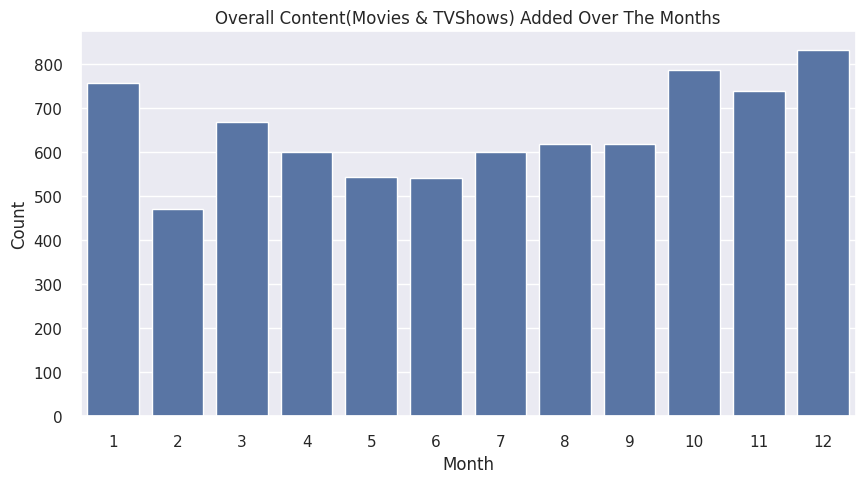

In [143]:
# Plotting the Countplot
# Plot the figure size
plt.figure(figsize=(10,5))
ax=sns.countplot(x='month',data=df) # Change 'month' to x='month'
# Set the title
plt.title('Overall Content(Movies & TVShows) Added Over The Months')
# Set x-label
plt.xlabel('Month')
# Set y-label
plt.ylabel('Count')

Most of the contents(TVShows/Movies) added in the month December.

Chart - 5 : Movies/TVshows Added Over The Months

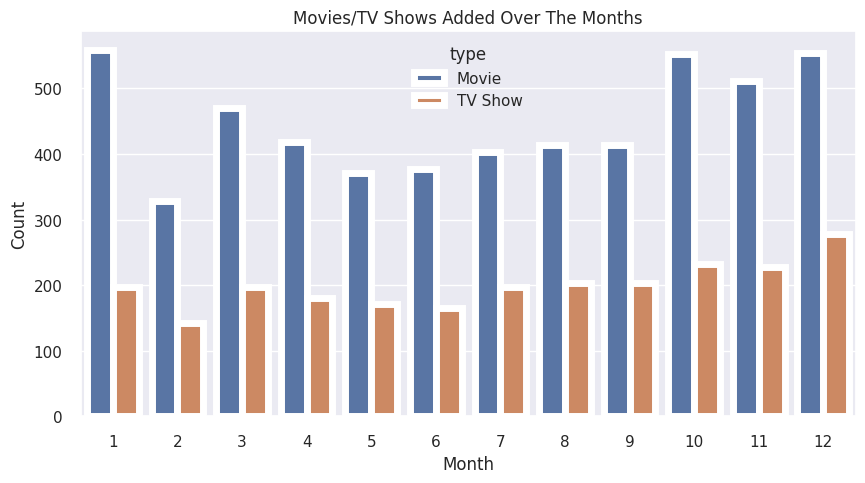

In [144]:
fig, ax = plt.subplots(figsize=(10,5))

sns.countplot(x='month', hue='type',lw=5, data=df, ax=ax)
# set the title
plt.title('Movies/TV Shows Added Over The Months')
# Set x-label
plt.xlabel('Month')
# Set y-label
plt.ylabel('Count')
# Display the graph
plt.show()

Chart 6 - Top 10 Genres in Movies/TVShows

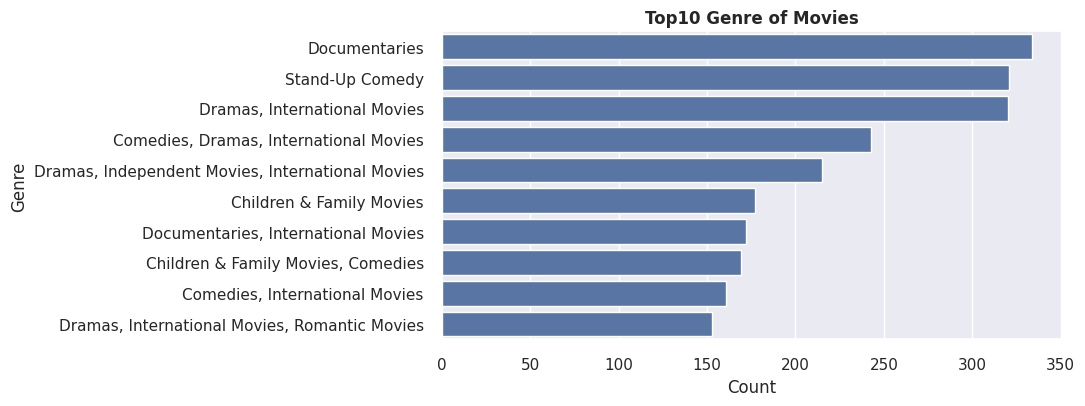

In [145]:
#Analysing top10 genre of the movies
# Set the figure size
plt.figure(figsize=(8,4))
sns.countplot(y=movies['listed_in'],data=movies,order=movies['listed_in'].value_counts().index[0:10])
# Set x-label
plt.xlabel('Count')
# Set y-label
plt.ylabel('Genre')
# Set the title
plt.title('Top10 Genre of Movies',fontweight="bold")
# Display the graph
plt.show()


Documentaries is the top genre in movies, the next followed by Stand-up comedy and Dramas,International Movies.

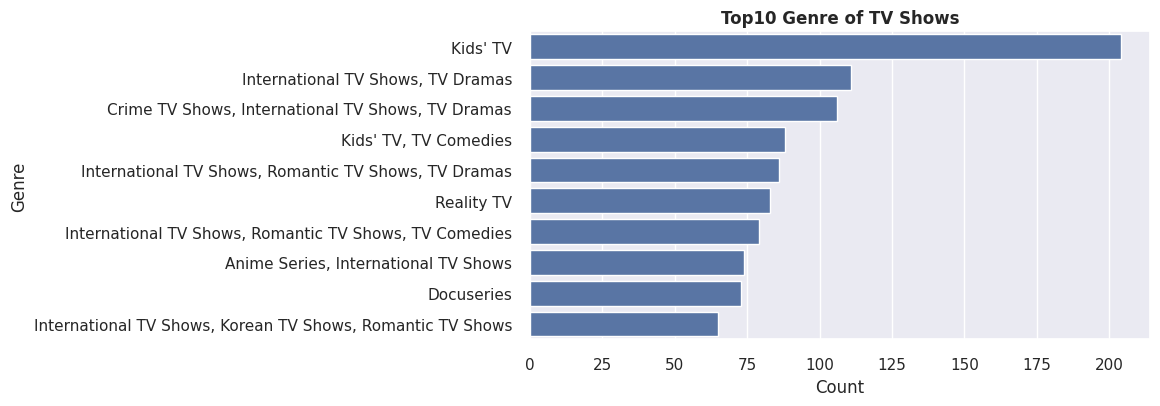

In [146]:
#Analysing top10 genres of TVSHOWS
# Set the figure size
plt.figure(figsize=(8,4))
sns.countplot(y=tv_shows['listed_in'],data=tv_shows,order=tv_shows['listed_in'].value_counts().index[0:10])
# Set x-label
plt.xlabel('Count')
# Set y-label
plt.ylabel('Genre')
# Set the title
plt.title('Top10 Genre of TV Shows',fontweight="bold")
# Display the graph
plt.show()

Kids' TV is the top genre in the TV Shows.

Chart 7 - Duration of Content

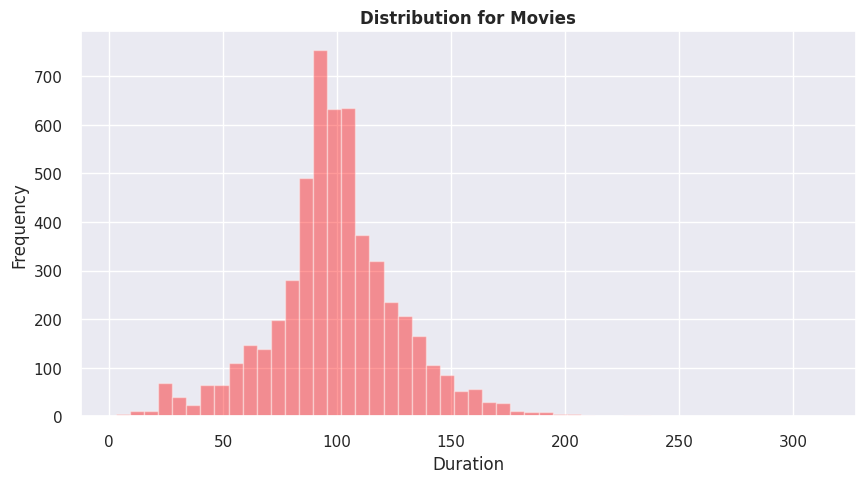

In [147]:
# Distribution of Movie Durations
plt.figure(figsize=(10,5))
#Regular Expression pattern \d is a regex pattern for digit + is a regex pattern for at least
sns.distplot(movies['duration'].str.extract('(\d+)'),kde=False, color=['red'])
# Set the title
plt.title('Distribution for Movies',fontweight="bold")
# Set x-label
plt.xlabel('Duration')
# Set y-label
plt.ylabel('Frequency')
# Display the graph
plt.show()

Most of the duration lies between 90 to 120 minutes.

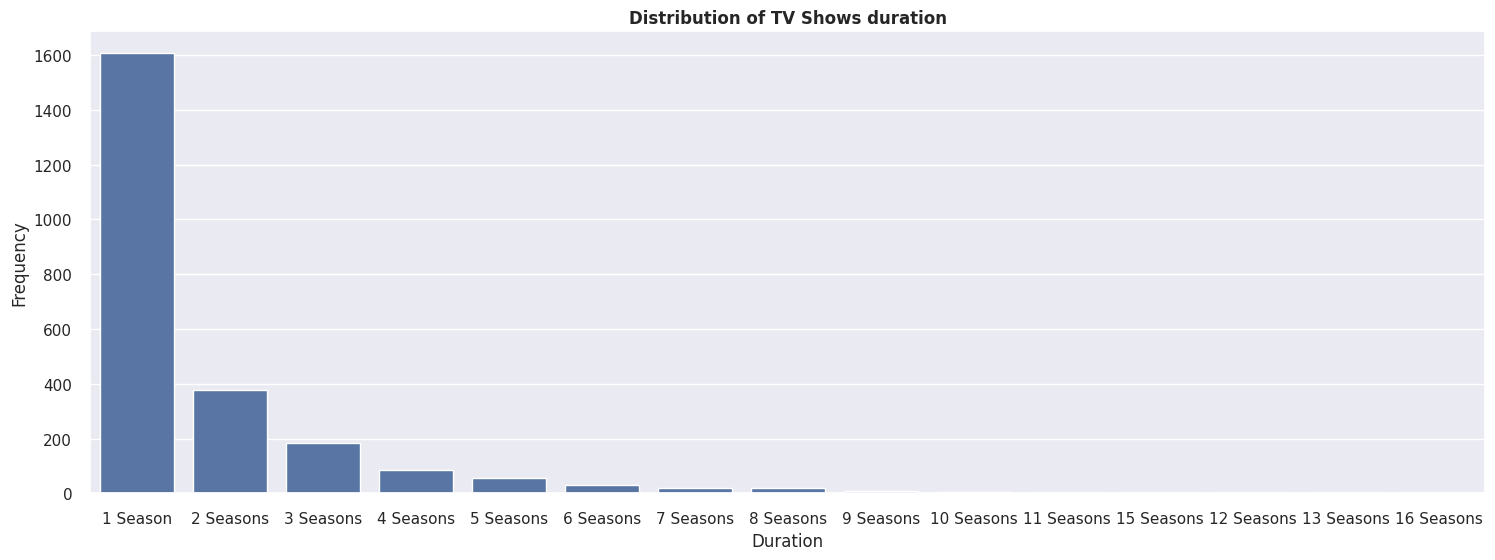

In [148]:
#Checking the distribution of TV SHOWS
# Plot the figure size
plt.figure(figsize=(18,6))
sns.countplot(x=tv_shows['duration'],data=tv_shows,order = tv_shows['duration'].value_counts().index)
# Set the title
plt.title("Distribution of TV Shows duration",fontweight='bold')
# Set x-label
plt.xlabel('Duration')
# Set y-label
plt.ylabel('Frequency')
# Display the graph
plt.show()


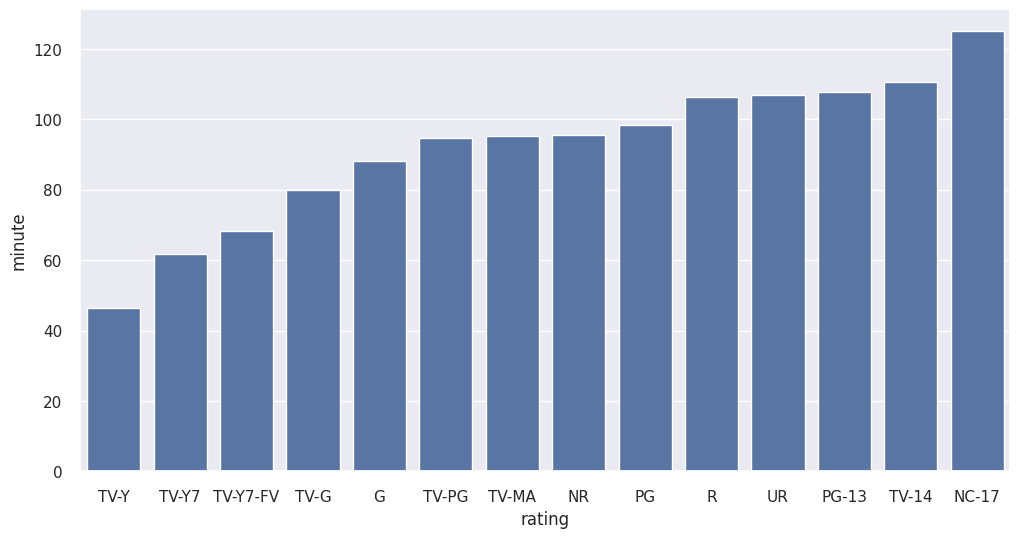

In [149]:
movies['minute'] = movies['duration'].str.extract('(\d+)').apply(pd.to_numeric)
duration_year = movies.groupby(['rating'])['minute'].mean()
duration_df=pd.DataFrame(duration_year).sort_values('minute')
# Plot the figure size
plt.figure(figsize=(12,6))
ax=sns.barplot(x=duration_df.index, y=duration_df.minute)

Movie rating NC-17 has the longest duration and TV-Y rating with low duration.

Chart 8 - Country wise Contents Released

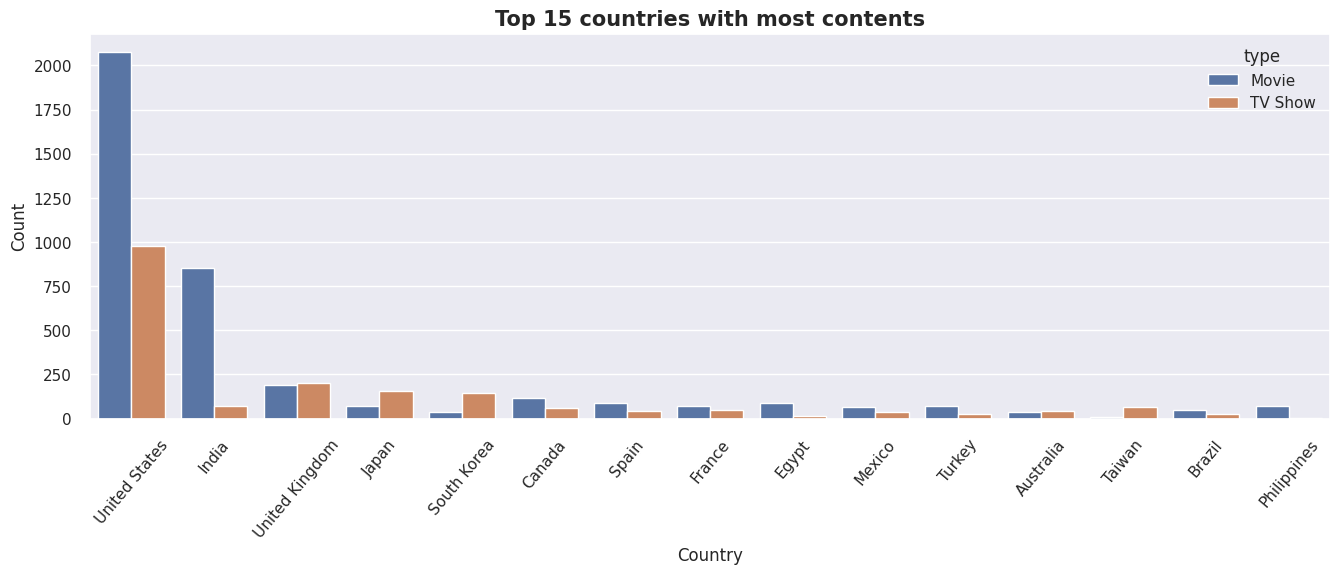

In [150]:
# Analysing top15 countries with most content
# Plot the figure size
plt.figure(figsize=(16,5))
sns.countplot(x=df['country'],order=df['country'].value_counts().index[0:15],hue=df['type'])
plt.xticks(rotation=50)
# Set the title
plt.title('Top 15 countries with most contents', fontsize=15, fontweight='bold')
# Set x-label
plt.xlabel('Country')
# Set y-label
plt.ylabel('Count')
# Display the graph
plt.show()

United States is the country releasing the most contents, followed by India.

In [151]:
#top countries where netflix is most popular
country=df['country'].value_counts().reset_index()
country

,country,count
0,United States,3051
1,India,923
2,United Kingdom,396
3,Japan,224
4,South Korea,183
...,...,...
676,"Canada, United States, India, United Kingdom",1
677,"United States, Brazil, South Korea, Mexico, Ja...",1
678,"France, Lebanon, United Kingdom",1
679,"United Kingdom, Jordan, Qatar, Iran",1


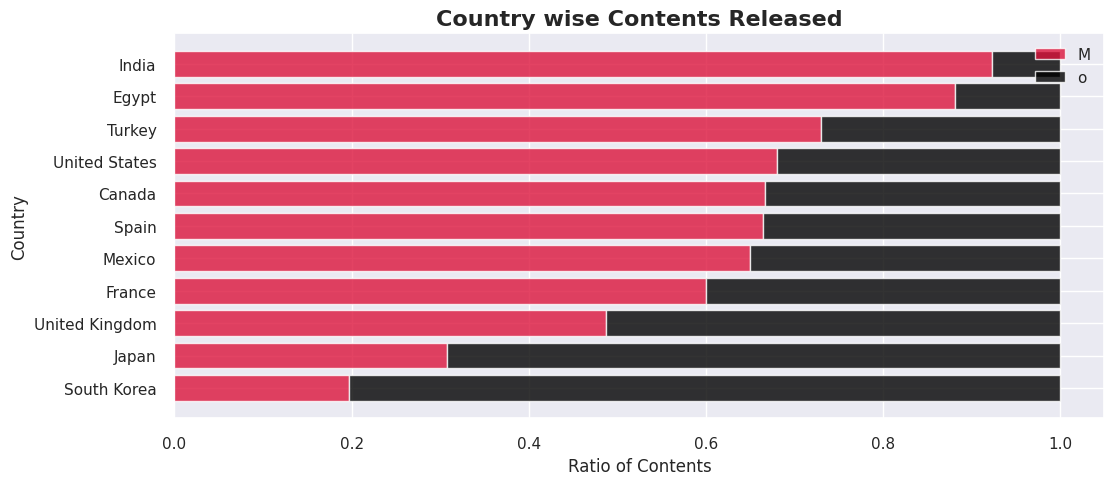

In [152]:
# Plotting the Horizontal bar plot for top 10 country contains Movie & TV Show split
country_order = df['country'].value_counts()[:11].index
content_data = df[['type', 'country']].groupby('country')['type'].value_counts().unstack().loc[country_order]
content_data['sum'] = content_data.sum(axis=1)
content_data_ratio = (content_data.T / content_data['sum']).T[['Movie', 'TV Show']].sort_values(by='Movie',ascending=False)[::-1]

# Plotting the barh
fig, ax = plt.subplots(1,1,figsize=(12,5),)

ax.barh(content_data_ratio.index, content_data_ratio['Movie'],
        color='crimson', alpha=0.8, label='Movie')
ax.barh(content_data_ratio.index, content_data_ratio['TV Show'], left=content_data_ratio['Movie'],
        color='black', alpha=0.8, label='TV Show')
# Set title
plt.title('Country wise Contents Released', fontsize=16, fontweight='bold')
# Set x-label
plt.xlabel('Ratio of Contents')
# Set y-label
plt.ylabel('Country')
# Set legend
plt.legend("Movies/TVShows")
# Display the graph
plt.show()

Chart 9 - Movies - Original in Netflix

In [153]:
df['date_added'] = pd.to_datetime(df['date_added'], format='%B %d, %Y', errors='coerce')
# Convert the 'date_added' column back to strings with the desired format before applying .str.strip()
df['date_added'] = df['date_added'].dt.strftime('%B %d, %Y').str.strip()
df['date_added'] = pd.to_datetime(df['date_added'], format='%B %d, %Y') # Remove leading/trailing spaces
movies['year_added'] = df['date_added'].dt.year
df

,show_id,type,title,cast,country,date_added,release_year,rating,duration,listed_in,description,target_ages,month
0,s1,TV Show,3%,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,2020-08-14,2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...,Adults,8
1,s2,Movie,7:19,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,2016-12-23,2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...,Adults,12
2,s3,Movie,23:59,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,2018-12-20,2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow...",Adults,12
3,s4,Movie,9,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,2017-11-16,2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi...",Teens,11
4,s5,Movie,21,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,2020-01-01,2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...,Teens,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7782,s7783,Movie,Zozo,"Imad Creidi, Antoinette Turk, Elias Gergi, Car...","Sweden, Czech Republic, United Kingdom, Denmar...",2020-10-19,2005,TV-MA,99 min,"Dramas, International Movies",When Lebanon's Civil War deprives Zozo of his ...,Adults,10
7783,s7784,Movie,Zubaan,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,2019-03-02,2015,TV-14,111 min,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...,Teens,3
7784,s7785,Movie,Zulu Man in Japan,Nasty C,United States,2020-09-25,2019,TV-MA,44 min,"Documentaries, International Movies, Music & M...","In this documentary, South African rapper Nast...",Adults,9
7785,s7786,TV Show,Zumbo's Just Desserts,"Adriano Zumbo, Rachel Khoo",Australia,2020-10-31,2019,TV-PG,1 Season,"International TV Shows, Reality TV",Dessert wizard Adriano Zumbo looks for the nex...,Older Kids,10


Some movies and TV shows were originally released elsewhere and later added to Netflix. However, content that premiered exclusively on Netflix is labeled as Netflix Originals.

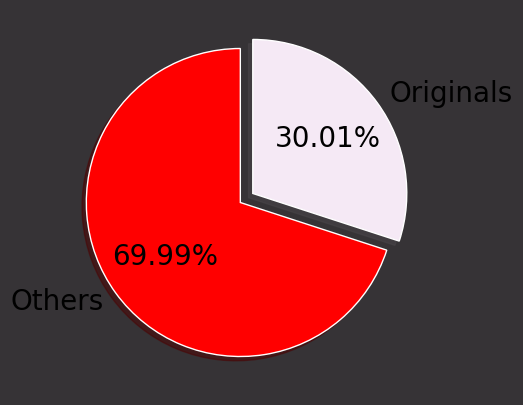

In [154]:
movies['originals'] = np.where(movies['release_year'] == movies['year_added'], 'Yes', 'No')
# pie plot showing percentage of originals and others in movies
fig, ax = plt.subplots(figsize=(5,5),facecolor="#363336")
ax.patch.set_facecolor('#363336')
explode = (0, 0.1)
ax.pie(movies['originals'].value_counts(), explode=explode, autopct='%.2f%%', labels= ['Others', 'Originals'],
       shadow=True, startangle=90,textprops={'color':"black", 'fontsize': 20}, colors =['red','#F5E9F5'])
#Display the graph
plt.show()

30% of the movies on Netflix were released exclusively on the platform, while 70% were previously released through other channels before being added to Netflix.

## **Hypothesis Testing**

Hypothesis testing is a statistical method used to make decisions or inferences about a population based on a sample of data. It involves formulating assumptions (hypotheses) and testing them to determine whether there is enough evidence to support or reject the assumption.

### **Hypothesis Testing - I**

HO:movies rated for kids and older kids are at least two hours long.

H1:movies rated for kids and older kids are not at least two hours long.

In [155]:
movies.head(3)

,show_id,type,title,cast,country,date_added,release_year,rating,duration,listed_in,description,target_ages,minute,year_added,originals
1,s2,Movie,7:19,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...,Adults,93,2016.0,Yes
2,s3,Movie,23:59,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow...",Adults,78,2018.0,No
3,s4,Movie,9,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi...",Teens,80,2017.0,No


In [156]:
#making copy of df_clean_frame
df_hypothesis=df.copy()
#head of df_hypothesis
df_hypothesis.head()

,show_id,type,title,cast,country,date_added,release_year,rating,duration,listed_in,description,target_ages,month
0,s1,TV Show,3%,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,2020-08-14,2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...,Adults,8
1,s2,Movie,7:19,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,2016-12-23,2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...,Adults,12
2,s3,Movie,23:59,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,2018-12-20,2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow...",Adults,12
3,s4,Movie,9,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,2017-11-16,2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi...",Teens,11
4,s5,Movie,21,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,2020-01-01,2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...,Teens,1


In [157]:
#filtering movie from Type_of_show column
df_hypothesis = df_hypothesis[df_hypothesis["type"] == "Movie"]

In [158]:
#with respect to each ratings assigning it into group of categories
ratings_ages = {
    'TV-PG': 'Older Kids',
    'TV-MA': 'Adults',
    'TV-Y7-FV': 'Older Kids',
    'TV-Y7': 'Older Kids',
    'TV-14': 'Teens',
    'R': 'Adults',
    'TV-Y': 'Kids',
    'NR': 'Adults',
    'PG-13': 'Teens',
    'TV-G': 'Kids',
    'PG': 'Older Kids',
    'G': 'Kids',
    'UR': 'Adults',
    'NC-17': 'Adults'
}

df_hypothesis['target_ages'] = df_hypothesis['rating'].replace(ratings_ages)
#let's see unique target ages
df_hypothesis['target_ages'].unique()

array(['Adults', 'Teens', 'Older Kids', 'Kids'], dtype=object)

In [159]:
#Another category is target_ages (4 classes).
df_hypothesis['target_ages'] = pd.Categorical(df_hypothesis['target_ages'], categories=['Kids', 'Older Kids', 'Teens', 'Adults'])
#from duration feature extractin string part and after extracting Changing the object type to numeric
df_hypothesis['duration']= df_hypothesis['duration'].str.extract('(\d+)')
df_hypothesis['duration'] = pd.to_numeric(df_hypothesis['duration'])
#head of df_
df_hypothesis.head(3)

,show_id,type,title,cast,country,date_added,release_year,rating,duration,listed_in,description,target_ages,month
1,s2,Movie,7:19,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,2016-12-23,2016,TV-MA,93,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...,Adults,12
2,s3,Movie,23:59,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,2018-12-20,2011,R,78,"Horror Movies, International Movies","When an army recruit is found dead, his fellow...",Adults,12
3,s4,Movie,9,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,2017-11-16,2009,PG-13,80,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi...",Teens,11


In [160]:

#group_by duration and target_ages
group_by_= df_hypothesis[['duration','target_ages']].groupby(by='target_ages')
#mean of group_by variable
group=group_by_.mean().reset_index()
group

,target_ages,duration
0,Kids,66.486891
1,Older Kids,92.024648
2,Teens,110.025332
3,Adults,98.275145


In [161]:
#In A and B variable grouping values
A= group_by_.get_group('Kids')
B= group_by_.get_group('Older Kids')
#mean and std. calculation for kids and older kids variables
# Calculate the mean of the 'duration' column only for Kids
M1 = A['duration'].mean()
# Calculate the standard deviation of the 'duration' column only for Kids
S1 = A['duration'].std()

# Calculate the mean of the 'duration' column only for Older Kids
M2= B['duration'].mean()
# Calculate the standard deviation of the 'duration' column only for Older Kids
S2 = B['duration'].std()

print('Mean for movies rated for Kids {} \n Mean for  movies rated for older kids {}'.format(M1,M2))
print('Std for  movies rated for Older Kids {} \n Std for  movies rated for kids {}'.format(S2,S1))

Mean for movies rated for Kids 66.48689138576779 
 Mean for  movies rated for older kids 92.02464788732394
Std for  movies rated for Older Kids 31.18257675842998 
 Std for  movies rated for kids 31.739464779840162


In [162]:
#import stats
from scipy import stats
#length of groups and DOF
n1 = len(A)
n2= len(B)
print(n1,n2)

dof = n1+n2-2
print('dof',dof)

sp_2 = ((n2-1)*S1**2  + (n1-1)*S2**2) / dof
print('SP_2 =',sp_2)

sp = np.sqrt(sp_2)
print('SP',sp)

#tvalue
t_val = (M1-M2)/(sp * np.sqrt(1/n1 + 1/n2))
print('tvalue',t_val) # Remove [0] to print the scalar value directly

267 852
dof 1117
SP_2 = 999.0491470682077
SP 31.60773872120889
tvalue -11.519926278533966


In [163]:
#t-distribution
stats.t.ppf(0.025,dof)

np.float64(-1.9620900365868952)

In [164]:
#t-distribution
stats.t.ppf(0.975,dof)

np.float64(1.9620900365868947)

Since the t-value falls outside the acceptable range, the null hypothesis is rejected.

This indicates that movies rated for kids and older kids are not at least two hours long.

### **Hypothesis Testing - II**

H1:The duration which is more than 90 mins are movies.

HO:The duration which is more than 90 mins are NOT movies.

In [165]:
#making copy of df_clean_frame
df_hypothesis2=df.copy()
#head of df_hypothesis
df_hypothesis2.head()

,show_id,type,title,cast,country,date_added,release_year,rating,duration,listed_in,description,target_ages,month
0,s1,TV Show,3%,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,2020-08-14,2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...,Adults,8
1,s2,Movie,7:19,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,2016-12-23,2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...,Adults,12
2,s3,Movie,23:59,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,2018-12-20,2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow...",Adults,12
3,s4,Movie,9,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,2017-11-16,2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi...",Teens,11
4,s5,Movie,21,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,2020-01-01,2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...,Teens,1


In [166]:
# Remove the lines causing the AttributeError:
# df_hypothesis['duration']= df_hypothesis['duration'].str.extract('(\d+)')
# df_hypothesis['duration'] = pd.to_numeric(df_hypothesis['duration'])

# Instead, if you need to extract the numeric part of the duration,
# assuming it's currently stored as an integer or float:
# You can convert it back to string and then extract digits:
df_hypothesis2['duration'] = df_hypothesis2['duration'].astype(str).str.extract('(\d+)')
df_hypothesis2['duration'] = pd.to_numeric(df_hypothesis2['duration'])

# Or, if you simply need to ensure it's numeric,
# you can directly apply pd.to_numeric:
# df_hypothesis['duration'] = pd.to_numeric(df_hypothesis['duration'], errors='coerce')

In [167]:

df_hypothesis2['type'] = pd.Categorical(df_hypothesis2['type'], categories=['Movie','TV Show'])
df_hypothesis2.head(3)


,show_id,type,title,cast,country,date_added,release_year,rating,duration,listed_in,description,target_ages,month
0,s1,TV Show,3%,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,2020-08-14,2020,TV-MA,4,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...,Adults,8
1,s2,Movie,7:19,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,2016-12-23,2016,TV-MA,93,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...,Adults,12
2,s3,Movie,23:59,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,2018-12-20,2011,R,78,"Horror Movies, International Movies","When an army recruit is found dead, his fellow...",Adults,12


In [168]:

#group_by duration and TYPE
group_by_= df_hypothesis2[['duration','type']].groupby(by='type')
#mean of group_by variable
group=group_by_.mean().reset_index()
group

,type,duration
0,Movie,99.330417
1,TV Show,1.761468


In [169]:
#In A and B variable grouping values
A= group_by_.get_group('Movie')
B= group_by_.get_group('TV Show')
#mean and std
# Calculate mean and std only for the 'duration' column
M1 = A['duration'].mean() # Changed from A.mean() to A['duration'].mean()
S1 = A['duration'].std() # Changed from A.std() to A['duration'].std()

M2= B['duration'].mean() # Changed from B.mean() to B['duration'].mean()
S2 = B['duration'].std() # Changed from B.std() to B['duration'].std()

print('Mean for Movies: {}, Mean for TV Shows: {}'.format(M1,M2)) # Updated print statement
print('Std for Movies: {}, Std for TV Shows: {}'.format(S1,S2))  # Updated print statement

Mean for Movies: 99.33041697691735, Mean for TV Shows: 1.761467889908257
Std for Movies: 28.524206060545687, Std for TV Shows: 1.5610988012493572


In [170]:
#import stats
from scipy import stats
#length of groups and DOF
n1 = len(A)
n2= len(B)
print(n1,n2)

dof = n1+n2-2
print('dof',dof)

sp_2 = ((n2-1)*S1**2  + (n1-1)*S2**2) / dof
print('SP_2 =',sp_2)

sp = np.sqrt(sp_2)
print('SP',sp)

#tvalue
t_val = (M1-M2)/(sp * np.sqrt(1/n1 + 1/n2))
print('tvalue',t_val) # Remove [0] to print the scalar value directly

5372 2398
dof 7768
SP_2 = 252.74989567420735
SP 15.898109814509628
tvalue 249.88962005047725


In [171]:
#t-distribution
stats.t.ppf(0.025,dof)

np.float64(-1.9602694215408423)

In [172]:
#t-distribution
stats.t.ppf(0.975,dof)

np.float64(1.9602694215408418)

Since the t-value falls outside the acceptable range, the null hypothesis is rejected.

This indicates that durations exceeding 90 minutes correspond to movies.

## **Feature Engineering**

Feature engineering is the process of selecting, modifying, or creating features to improve model performance. It is a critical step in building effective machine learning models.

**Importance:**

* **Improves Model Accuracy:** Well-engineered features make patterns in the data more recognizable, improving the model's predictive power.

* **Reduces Complexity:** Simplifies data by eliminating irrelevant or redundant features, enhancing efficiency and interpretability.

* **Handles Real-World Data Challenges:** Deals with missing values, noise, and outliers to create robust models.

* **Enhances Model Generalization:** Helps models perform better on unseen data by capturing meaningful representations of the data.

* **Supports Domain Expertise:** Combines domain knowledge to create features that better represent the problem, leading to better insights.

In [173]:
df.columns

Index(['show_id', 'type', 'title', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description',
       'target_ages', 'month'],
      dtype='object')

In [174]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7770 entries, 0 to 7786
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   show_id       7770 non-null   object        
 1   type          7770 non-null   category      
 2   title         7770 non-null   object        
 3   cast          7770 non-null   object        
 4   country       7770 non-null   object        
 5   date_added    7682 non-null   datetime64[ns]
 6   release_year  7770 non-null   int64         
 7   rating        7770 non-null   object        
 8   duration      7770 non-null   object        
 9   listed_in     7770 non-null   object        
 10  description   7770 non-null   object        
 11  target_ages   7770 non-null   category      
 12  month         7770 non-null   int32         
dtypes: category(2), datetime64[ns](1), int32(1), int64(1), object(8)
memory usage: 971.6+ KB


In [175]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem.snowball import SnowballStemmer
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [176]:
df['description'].astype(str)

,description
0,In a future where the elite inhabit an island ...
1,After a devastating earthquake hits Mexico Cit...
2,"When an army recruit is found dead, his fellow..."
3,"In a postapocalyptic world, rag-doll robots hi..."
4,A brilliant group of students become card-coun...
...,...
7782,When Lebanon's Civil War deprives Zozo of his ...
7783,A scrappy but poor boy worms his way into a ty...
7784,"In this documentary, South African rapper Nast..."
7785,Dessert wizard Adriano Zumbo looks for the nex...


In [177]:
# after above all the changes, those features are in list format, so making list of description feature
df['description'] = df['description'].apply(lambda x: x.split(' '))

In [178]:
# converting text feature to string from list
df['description']= df['description'].apply(lambda x: " ".join(x))
# making all the words in text feature to lowercase
df['description']= df['description'].apply(lambda x: x.lower())

In [179]:
def remove_punctuation(text):
    '''a function for removing punctuation'''
    import string
    # replacing the punctuations with no space,
    # which in effect deletes the punctuation marks
    translator = str.maketrans('', '', string.punctuation)
    # return the text stripped of punctuation marks
    return text.translate(translator)
# applying above function on text feature
df['description']= df['description'].apply(remove_punctuation)

In [180]:
df['description'][0:10]

,description
0,in a future where the elite inhabit an island ...
1,after a devastating earthquake hits mexico cit...
2,when an army recruit is found dead his fellow ...
3,in a postapocalyptic world ragdoll robots hide...
4,a brilliant group of students become cardcount...
5,a genetics professor experiments with a treatm...
6,after an awful accident a couple admitted to a...
7,after one of his high school students attacks ...
8,when a doctor goes missing his psychiatrist wi...
9,an architect and his wife move into a castle t...


In [181]:
# using nltk library to download stopwords
import nltk
nltk.download('stopwords')

from nltk.corpus import stopwords
sw=stopwords.words('english')
#Defining stopwords
def stopwords(text):
    '''a function for removing the stopword'''
    text = [word for word in text.split() if word not in sw]
    # joining the list of words with space separator
    return " ".join(text)
# applying above function on text feature
df['description']=df['description'].apply(stopwords)
# this is how value in text looks like after removing stopwords
df['description'][0]

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


'future elite inhabit island paradise far crowded slums get one chance join 3 saved squalor'

In [182]:
# importing TfidVectorizer from sklearn library
from sklearn.feature_extraction.text import TfidfVectorizer

In [183]:
#Applying Tfidf Vectorizer
tfidfmodel = TfidfVectorizer(max_features=5000)
X_tfidf = tfidfmodel.fit_transform(df['description'])
X_tfidf.shape

(7770, 5000)

In [184]:
# convert X into array form for clustering
X = X_tfidf.toarray()

## **Clustering algorithms**

Clustering is an unsupervised learning technique used to group data points into clusters based on their similarity. Unlike supervised learning, clustering does not require labeled data. It is widely used for pattern recognition, data segmentation, and exploratory data analysis.

## 1. K-Mean Clustering Algorithm

K-Means is a popular partition-based clustering algorithm that groups data into
𝑘 clusters. It is iterative and aims to minimize the within-cluster sum of squares (WCSS).

Finding the optimal number of clusters using the elbow method.

**Elbow Method:**

The elbow method is a technique used to determine the optimal number of clusters (𝑘) in clustering algorithms like K-Means.

**How it works:**

* The method calculates the Within-Cluster Sum of Squares (WCSS) for different values of
𝑘, which measures the compactness of clusters.

* WCSS typically decreases as
𝑘 increases, because more clusters mean smaller distances within clusters.

* Plot
𝑘 against WCSS. Look for the "elbow" point, where the rate of decrease sharply changes to a slower decline.

* The "elbow" is considered the optimal number of clusters since adding more clusters beyond this point does not significantly improve compactness.

**Key Insight:** The elbow point balances clustering accuracy with simplicity, avoiding overfitting.

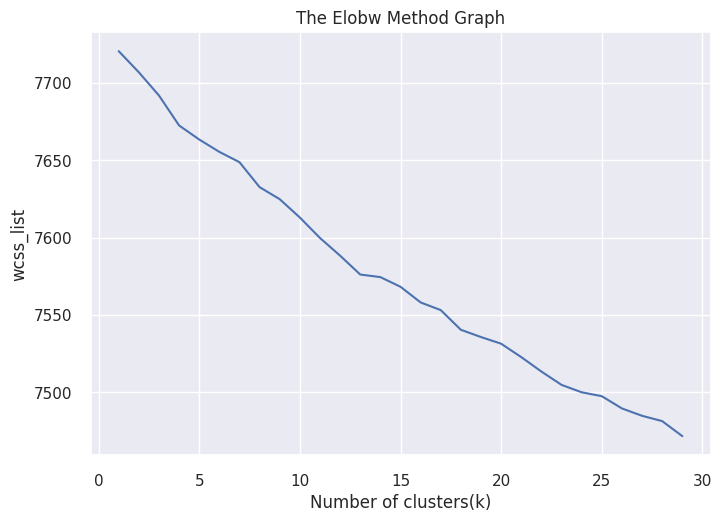

In [185]:
#finding optimal number of clusters using the elbow method
from sklearn.cluster import KMeans
wcss_list= []  #Initializing the list for the values of WCSS

#Using for loop for iterations from 1 to 30.
for i in range(1, 30):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state= 42)
    kmeans.fit(X)
    wcss_list.append(kmeans.inertia_)
plt.plot(range(1, 30), wcss_list)
# Set the title
plt.title('The Elobw Method Graph')
# Set x-label
plt.xlabel('Number of clusters(k)')
# Set y-label
plt.ylabel('wcss_list')
# Display the graph
plt.show()

**Silhouette Score:**

The silhouette score is a metric used to evaluate the quality of clustering by measuring how well data points are assigned to their clusters.

Range:

Silhouette score S(i) lies between -1 and 1:

S(i)≈1: Well-clustered point.

S(i)≈0: Point is on the cluster boundary.

S(i)≈−1: Point is likely assigned to the wrong cluster.

In [186]:
from sklearn.metrics import silhouette_score
#sillhoute score of clusters
sill = []
for i in range(2,30):
    model = KMeans(n_clusters=i,init ='k-means++',random_state=51)
    model.fit(X)
    y1 = model.predict(X)
    score = silhouette_score(X,y1)
    sill.append(score)
    print('cluster: %d \t Sillhoute: %0.4f'%(i,score))

cluster: 2 	 Sillhoute: 0.0011
cluster: 3 	 Sillhoute: 0.0015
cluster: 4 	 Sillhoute: 0.0020
cluster: 5 	 Sillhoute: 0.0022
cluster: 6 	 Sillhoute: 0.0025
cluster: 7 	 Sillhoute: 0.0028
cluster: 8 	 Sillhoute: 0.0029
cluster: 9 	 Sillhoute: 0.0034
cluster: 10 	 Sillhoute: 0.0037
cluster: 11 	 Sillhoute: 0.0041
cluster: 12 	 Sillhoute: 0.0042
cluster: 13 	 Sillhoute: 0.0048
cluster: 14 	 Sillhoute: 0.0050
cluster: 15 	 Sillhoute: 0.0053
cluster: 16 	 Sillhoute: 0.0056
cluster: 17 	 Sillhoute: 0.0058
cluster: 18 	 Sillhoute: 0.0058
cluster: 19 	 Sillhoute: 0.0059
cluster: 20 	 Sillhoute: 0.0059
cluster: 21 	 Sillhoute: 0.0065
cluster: 22 	 Sillhoute: 0.0066
cluster: 23 	 Sillhoute: 0.0067
cluster: 24 	 Sillhoute: 0.0065
cluster: 25 	 Sillhoute: 0.0066
cluster: 26 	 Sillhoute: 0.0069
cluster: 27 	 Sillhoute: 0.0068
cluster: 28 	 Sillhoute: 0.0070
cluster: 29 	 Sillhoute: 0.0070


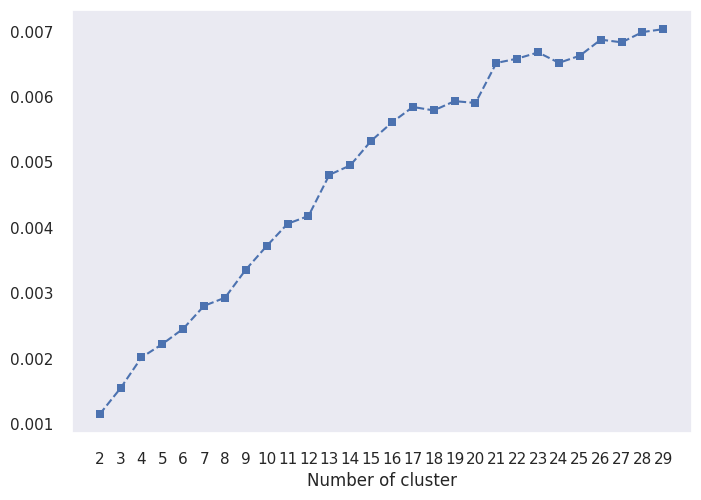

In [187]:
#Plotting Sillhoute's score
plt.plot(sill,'bs--')
# Adjust the xticks range to match the number of labels
plt.xticks(list(range(0,28)),list(range(2,30)))
plt.grid(),plt.xlabel('Number of cluster')
plt.show()

From elbow and sillhoute score ,forming 26 number of clusters.

In [188]:
#training the K-means model on a dataset
kmeans = KMeans(n_clusters= 26, init='k-means++', random_state= 42)
y_predict= kmeans.fit_predict(X)

Evaluation

In [189]:
#Predict the clusters and evaluate the silhouette score

score = silhouette_score(X, y_predict)
print("Silhouette score is {}".format(score))

Silhouette score is 0.007014124468413074


In [190]:
#davies_bouldin_score of our clusters
from sklearn.metrics import davies_bouldin_score
davies_bouldin_score(X, y_predict)

np.float64(9.258534879012016)

In [191]:
#Adding a seperate column for the cluster
df["cluster"] = y_predict

In [192]:
df['cluster'].value_counts()

,count
cluster,
5,2515
23,541
22,337
16,331
2,295
19,285
7,275
0,251
8,232


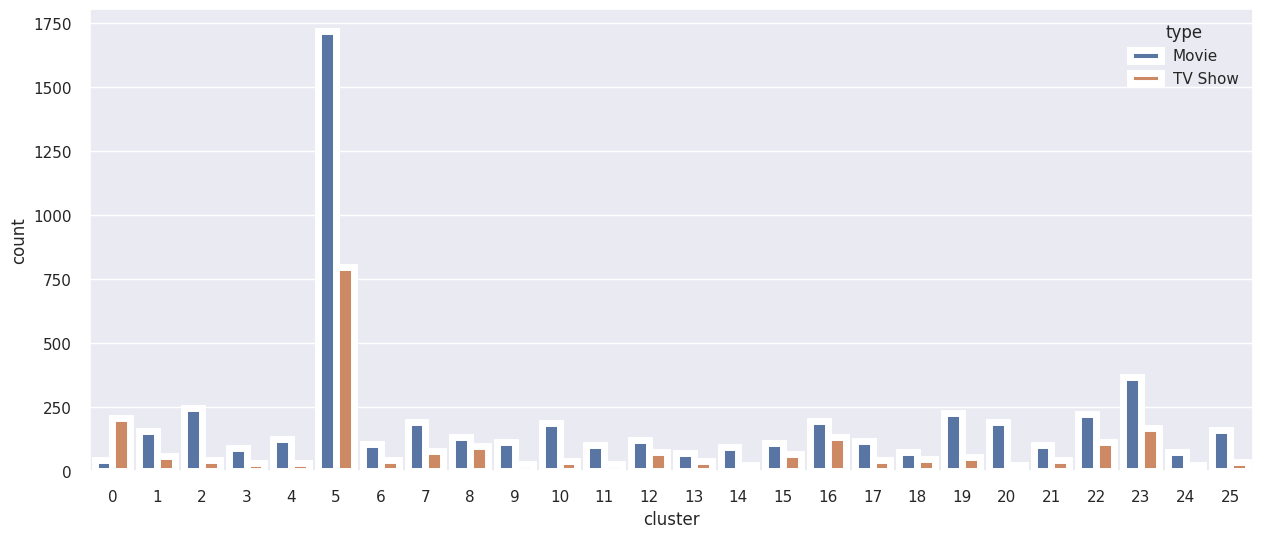

In [193]:
fig, ax = plt.subplots(figsize=(15,6))
sns.countplot(x='cluster', hue='type',lw=5, data=df, ax=ax)
plt.show()

Cluster 5 has the highest number of datapoints

In [194]:
#SCATTER PLOT FOR CLUSTERS
fig = px.scatter(df, y="description", x="cluster",color="cluster")
fig.update_traces(marker_size=100)
fig.show()

### 2.Agglomerative Clustering

Agglomerative clustering is a type of hierarchical clustering that builds a tree-like structure (dendrogram) of clusters by starting with each data point as its own cluster and then merging them iteratively.

**Dendogram**

A dendrogram is a tree-like diagram used to represent the hierarchical relationships between objects in a dataset. It is commonly used in hierarchical clustering to visualize the process of merging clusters or splitting them based on similarity or distance.

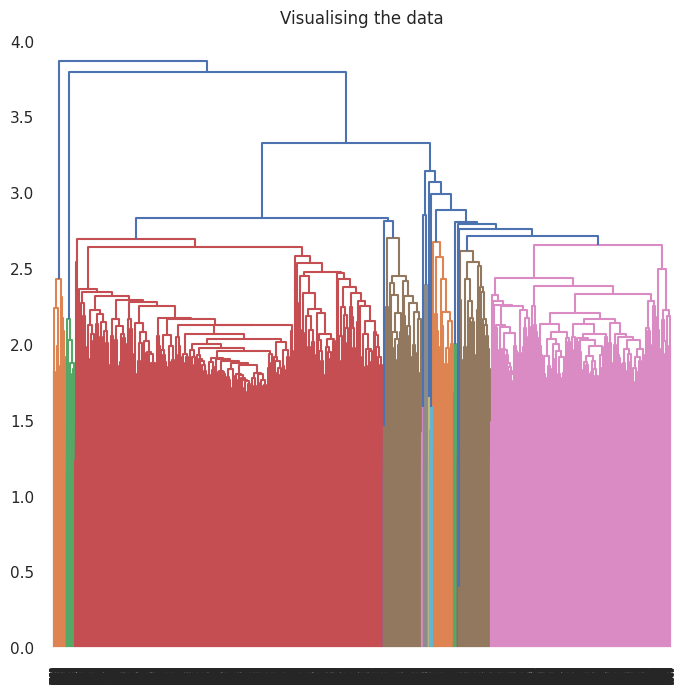

In [195]:
import scipy.cluster.hierarchy as shc
plt.figure(figsize =(8, 8))
plt.title('Visualising the data')
Dendrogram = shc.dendrogram((shc.linkage(X, method ='ward')))

In [ ]:
#Fitting our variable in Agglomerative Clusters
from sklearn.cluster import AgglomerativeClustering
aggh = AgglomerativeClustering(n_clusters=6, linkage='ward')
aggh.fit(X)
#Predicting using our model
y_hc=aggh.fit_predict(X)

In [ ]:
df_hierarchical =df.copy()
#creating a column where each row is assigned to their separate cluster
df_hierarchical['cluster'] = aggh.labels_
df_hierarchical.head()

Evaluation

In [ ]:
#Silhouette Coefficient
print("Silhouette Coefficient: %0.3f"%silhouette_score(X,y_hc, metric='euclidean'))

In [ ]:
#davies_bouldin_score of our clusters
from sklearn.metrics import davies_bouldin_score
davies_bouldin_score(X, y_hc)


## **Dataset-Based Conclusion: Netflix Content Insights & Clustering Analysis**
**Clustering Overview**

* Using both the elbow method and silhouette score, the ideal number of clusters was determined to be 26.

* Among the evaluated models, K-Means clustering outperformed Hierarchical clustering in capturing meaningful patterns.

* Cluster 0 contained the largest share of data points, suggesting a core group of frequently occurring or highly similar content features.

**Content Composition on Netflix**
* The platform boasts a larger library of movies (5,372) compared to TV shows (2,398).

* TV-MA (mature audience) emerged as the most prevalent rating across Netflix’s TV catalog.

**Release Trends**

* Peak years for movie releases: 2017, 2018, and a resurgence in 2020.

* Content growth accelerated post-2015, particularly for movies.

* A noticeable dip after 2020 may reflect shifting priorities or external factors like production challenges.

* Seasonal pattern observed: Most content is added to Netflix between October and January, aligning with year-end strategies or festive viewing spikes.

**Genre Popularity**

* Movies: Leading genres include Documentaries, Stand-up Comedy, Drama, and International Movies.

* TV Shows: Kids’ TV dominates, potentially reflecting family-oriented programming and younger audience targeting.

**Duration & Format**

* Movie runtimes mostly fall between 50 to 150 minutes, ideal for typical viewing habits.

* Single-season formats are common among TV shows, emphasizing limited-series appeal.

* NC-17-rated movies average the longest durations, while TV-Y rated content is notably shorter—likely designed for young viewers.

**Regional Distribution**

* United States leads in overall title availability, reflecting its central role in Netflix’s production and acquisition strategy.

* India follows closely, especially in movie quantity, showcasing strong regional representation and content demand.

**Release Channels**

* 30% of movies were released exclusively on Netflix, while 70% originated elsewhere before joining the platform—highlighting both in-house productions and licensed content streams.






